In [1]:
import os
import numpy as np
# import efficientnet.tfkeras

from vit_keras import vit, utils
from tensorflow.keras.models import load_model
# validation
import pandas as pd

2023-04-03 15:04:06.411935: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-03 15:04:06.502030: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-03 15:04:06.901410: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/kannika/miniconda3/envs/vit-tf/lib/
2023-04-03 15:04:06.901457: W tensorflow/com

In [2]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [3]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU') 
print("Num GPUs:", len(physical_devices))

Num GPUs: 0


2023-03-14 16:21:18.847626: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-03-14 16:21:18.847648: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: tiny-photogram
2023-03-14 16:21:18.847651: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: tiny-photogram
2023-03-14 16:21:18.847722: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.161.3
2023-03-14 16:21:18.847733: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.161.3
2023-03-14 16:21:18.847735: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.161.3


## load model

In [4]:
#load model  #ValueError: Unknown layer: 'Custom>ClassToken'
from tensorflow.keras.models import load_model

model_dir ='/media/data/ModelVit/Regression/tensorflow/Exp-1/R1/models/modelRegress_ViT_l32_Rheology_R1.h5'
model = load_model(model_dir)
model
# height = width = model.input_shape[1]
# # model = tf.keras.models.load_model(
# #     model_dir,
# #     custom_objects={'Custom>ClassToken':tf.keras.models.Model, 'Custom>AddPositionEmbs':tf.keras.models.Model})
# # model.summary()
# print(f"height: {height}, width: {width}")

2023-03-14 16:21:21.355949: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.summary()

Model: "visionregress_transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit-l32 (Functional)        (None, 1024)              305510400 
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 64)  

-------------------------------------------------------------------------------------------------------------------------------

### 📂Checkpoint

In [3]:
#load model  #ValueError: Unknown layer: 'Custom>ClassToken'

model_dir = '/media/SSD/rheology2023/VitModel/Regression/tensorflow/Exp-4-2/R2/checkpoin_callback/'
model = load_model(model_dir)
height = width = model.input_shape[1]
input_shape = (height, width, 3)

2023-04-03 15:09:05.592456: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-03 15:09:06.007267: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22270 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090 Ti, pci bus id: 0000:65:00.0, compute capability: 8.6


In [4]:
model.summary()

Model: "Vit_Regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 7, 7, 1024)        3146752   
                                                                 
 reshape (Reshape)           (None, 49, 1024)          0         
                                                                 
 class_token (ClassToken)    (None, 50, 1024)          1024      
                                                                 
 Transformer/posembed_input   (None, 50, 1024)         51200     
 (AddPositionEmbs)                                               
                                                                 
 Transformer/encoderblock_0   ((None, 50, 1024),       12596224  
 (TransformerBlock)           (None, 16, None, None)

## Evaluation model

In [6]:
###** Test set

dataframe = pd.read_csv('/home/kannika/CSV/MSDT_datatest.csv')
print(dataframe.shape)
dataframe.head(5)

(870, 9)


,Unnamed: 0.1,Unnamed: 0,GLY,folderName,fileName,pathimg,idt,MSDT,subset
0,0,0,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,158,5.63,test
1,1,1,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,25,0.84,test
2,2,2,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,7,0.25,test
3,3,3,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,125,4.45,test
4,4,4,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,19,0.63,test


In [7]:
height = width = model.input_shape[1]
print(f"height: {height}, width: {width}")

BATCH_SIZE = 16

height: 224, width: 224


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

valid_datagen = ImageDataGenerator(rescale=1./255)

val_generator = valid_datagen.flow_from_dataframe(
                dataframe = dataframe,
                directory = None,
                x_col = 'pathimg',
                y_col = 'MSDT',
                target_size = (height, width),
                batch_size=BATCH_SIZE,
                color_mode= 'rgb',
                class_mode='raw')

Found 870 validated image filenames.


In [13]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])
    
    return result[0]

#Predict
pred_list = list()
#prob_list = list()
img_path=dataframe['pathimg'].tolist()
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    pred_list.append(predict[0])
    print(predict)

1/1 [==============================] - 0s 121ms/step
[7.8783617]
1/1 [==============================] - 0s 122ms/step
[0.51902395]
1/1 [==============================] - 0s 125ms/step
[0.26609224]
1/1 [==============================] - 0s 120ms/step
[6.268558]
1/1 [==============================] - 0s 120ms/step
[0.42514095]
1/1 [==============================] - 0s 120ms/step
[2.3282666]
1/1 [==============================] - 0s 122ms/step
[22.510555]
1/1 [==============================] - 0s 121ms/step
[33.62011]
1/1 [==============================] - 0s 120ms/step
[61.83906]
1/1 [==============================] - 0s 119ms/step
[0.14934084]
1/1 [==============================] - 0s 121ms/step
[24.023872]
1/1 [==============================] - 0s 120ms/step
[1.4724703]
1/1 [==============================] - 0s 121ms/step
[13.964749]
1/1 [==============================] - 0s 120ms/step
[0.46746904]
1/1 [==============================] - 0s 121ms/step
[0.67285216]
1/1 [=================

1/1 [==============================] - 0s 119ms/step
[0.9113643]
1/1 [==============================] - 0s 122ms/step
[0.76079905]
1/1 [==============================] - 0s 122ms/step
[0.35030025]
1/1 [==============================] - 0s 121ms/step
[11.546949]
1/1 [==============================] - 0s 121ms/step
[0.7652948]
1/1 [==============================] - 0s 121ms/step
[7.34916]
1/1 [==============================] - 0s 121ms/step
[0.31237766]
1/1 [==============================] - 0s 120ms/step
[17.372274]
1/1 [==============================] - 0s 120ms/step
[4.9950647]
1/1 [==============================] - 0s 120ms/step
[18.66643]
1/1 [==============================] - 0s 121ms/step
[1.0355009]
1/1 [==============================] - 0s 120ms/step
[0.47236127]
1/1 [==============================] - 0s 121ms/step
[0.45936075]
1/1 [==============================] - 0s 121ms/step
[36.277023]
1/1 [==============================] - 0s 121ms/step
[0.17424868]
1/1 [=================

1/1 [==============================] - 0s 119ms/step
[0.8399179]
1/1 [==============================] - 0s 123ms/step
[2.9846268]
1/1 [==============================] - 0s 120ms/step
[0.32385996]
1/1 [==============================] - 0s 123ms/step
[0.21361725]
1/1 [==============================] - 0s 120ms/step
[1.1750075]
1/1 [==============================] - 0s 120ms/step
[8.645302]
1/1 [==============================] - 0s 122ms/step
[14.587053]
1/1 [==============================] - 0s 121ms/step
[0.09428737]
1/1 [==============================] - 0s 121ms/step
[0.6529059]
1/1 [==============================] - 0s 121ms/step
[0.95917344]
1/1 [==============================] - 0s 121ms/step
[4.4184384]
1/1 [==============================] - 0s 121ms/step
[0.3229095]
1/1 [==============================] - 0s 120ms/step
[2.1766298]
1/1 [==============================] - 0s 120ms/step
[0.63642764]
1/1 [==============================] - 0s 119ms/step
[0.21911596]
1/1 [===============

1/1 [==============================] - 0s 120ms/step
[1.7789679]
1/1 [==============================] - 0s 121ms/step
[3.9788535]
1/1 [==============================] - 0s 123ms/step
[0.15400566]
1/1 [==============================] - 0s 124ms/step
[30.118137]
1/1 [==============================] - 0s 121ms/step
[0.32168806]
1/1 [==============================] - 0s 120ms/step
[9.817136]
1/1 [==============================] - 0s 120ms/step
[17.277195]
1/1 [==============================] - 0s 122ms/step
[7.3759394]
1/1 [==============================] - 0s 121ms/step
[0.3527589]
1/1 [==============================] - 0s 119ms/step
[15.880825]
1/1 [==============================] - 0s 119ms/step
[0.21112302]
1/1 [==============================] - 0s 120ms/step
[0.14694534]
1/1 [==============================] - 0s 121ms/step
[25.522112]
1/1 [==============================] - 0s 119ms/step
[10.440687]
1/1 [==============================] - 0s 121ms/step
[0.24524982]
1/1 [================

[0.19155452]
1/1 [==============================] - 0s 121ms/step
[6.176292]
1/1 [==============================] - 0s 122ms/step
[-0.07523273]
1/1 [==============================] - 0s 123ms/step
[0.2384638]
1/1 [==============================] - 0s 122ms/step
[0.161764]
1/1 [==============================] - 0s 122ms/step
[0.9002891]
1/1 [==============================] - 0s 121ms/step
[0.31563443]
1/1 [==============================] - 0s 122ms/step
[0.08089639]
1/1 [==============================] - 0s 123ms/step
[0.08692905]
1/1 [==============================] - 0s 121ms/step
[0.28075022]
1/1 [==============================] - 0s 123ms/step
[0.47966123]
1/1 [==============================] - 0s 122ms/step
[1.289813]
1/1 [==============================] - 0s 122ms/step
[0.08390491]
1/1 [==============================] - 0s 121ms/step
[0.2601449]
1/1 [==============================] - 0s 122ms/step
[0.12393489]
1/1 [==============================] - 0s 122ms/step
[0.10316893]
1/1 [

In [15]:
pred_list

[7.8783617,
 0.51902395,
 0.26609224,
 6.268558,
 0.42514095,
 2.3282666,
 22.510555,
 33.62011,
 61.83906,
 0.14934084,
 24.023872,
 1.4724703,
 13.964749,
 0.46746904,
 0.67285216,
 0.19015108,
 33.064884,
 0.07122868,
 0.24791871,
 41.83454,
 13.650129,
 20.406248,
 0.3849228,
 0.3685666,
 29.332327,
 1.1115563,
 0.6481791,
 6.294037,
 0.24843773,
 17.52804,
 38.170753,
 2.520817,
 1.4603914,
 0.124914765,
 0.15089694,
 14.318902,
 13.427781,
 6.0294414,
 38.786762,
 0.29047114,
 0.19062397,
 26.391232,
 1.7452732,
 -0.010177948,
 0.28970546,
 10.220673,
 0.5181297,
 0.2022322,
 45.55712,
 30.936867,
 0.13417543,
 60.41806,
 2.14854,
 0.19574074,
 0.48107418,
 0.28298765,
 8.133091,
 0.06167367,
 0.42140865,
 0.46992478,
 3.995739,
 11.283685,
 42.01565,
 0.16833165,
 27.968594,
 0.098980546,
 0.21899422,
 0.40881154,
 5.2646194,
 1.5193888,
 0.30978367,
 28.617247,
 0.14873828,
 15.580347,
 0.55016935,
 6.401608,
 0.37612483,
 1.3997737,
 58.79906,
 26.944145,
 0.040781714,
 3.7462

In [14]:
print(len(pred_list))

dataframe['pre_MSDT'] = pred_list
dataframe.head(3)

870


,Unnamed: 0.1,Unnamed: 0,GLY,folderName,fileName,pathimg,idt,MSDT,subset,pre_MSDT
0,0,0,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,158,5.63,test,7.878362
1,1,1,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,25,0.84,test,0.519024
2,2,2,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204,GLY10P100_D0_30HZ_20XINF_UWELL_20221230_072204...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,7,0.25,test,0.266092


In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


y_test = dataframe['MSDT'].tolist()
# The mean squared error
print("Mean squared error: %.4f" % mean_squared_error(y_test, pred_list))
print("Root Mean squared error: %.4f" % mean_squared_error(y_test, pred_list, squared=False))
print("Mean absolute error: %.4f" % mean_absolute_error(y_test, pred_list))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.4f" % r2_score(y_test, pred_list))

Mean squared error: 4.0926
Root Mean squared error: 2.0230
Mean absolute error: 1.1104
Coefficient of determination: 0.9476


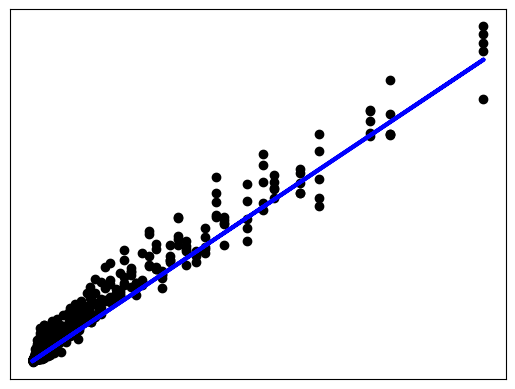

In [17]:
# Plot outputs
plt.scatter(y_test, pred_list, color="black")
plt.plot(y_test, y_test, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Plot : GLY10

> ## t & msd unit

In [24]:
df_idt = pd.read_csv('/home/kannika/CSV/MSDT_G10.csv')
print(df_idt.shape)
df_idt.head(3)

(29, 3)


,dt,t,msd_unit_umPower2
0,1,0.052498,0.05
1,2,0.091199,0.09
2,3,0.140551,0.14


In [44]:
import random

GLY10 = dataframe[dataframe['GLY']=='GLY10']
setFolder = list(set(GLY10['folderName']))
rand = random.choices(setFolder, k=1)
rand_ = rand[0]
df_rand = GLY10[GLY10['folderName']==rand_].reset_index(drop=True)
print(df_rand.shape)
df_rand = df_rand.sort_values(by=['idt'])
list_t = df_idt['t'].tolist()
df_rand['t'] = list_t
df_rand.head(3)

(29, 10)


,Unnamed: 0.1,Unnamed: 0,GLY,folderName,fileName,pathimg,idt,MSDT,subset,pre_MSDT,t
22,80,80,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221229_204812,GLY10P100_D0_30HZ_20XINF_UWELL_20221229_204812...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,1,0.05,test,0.040782,0.052498
7,65,65,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221229_204812,GLY10P100_D0_30HZ_20XINF_UWELL_20221229_204812...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,2,0.09,test,0.098981,0.091199
14,72,72,GLY10,GLY10P100_D0_30HZ_20XINF_UWELL_20221229_204812,GLY10P100_D0_30HZ_20XINF_UWELL_20221229_204812...,/media/data/Glycerol_FFT_test/GLY10/GLY10P100_...,3,0.14,test,0.148738,0.140551


In [36]:
#df_rand['idt'].tolist()

In [48]:
#df_idt['dt'].tolist()
lstMSDT = df_rand['MSDT'].tolist() 
lstpre_MSDT = df_rand['pre_MSDT'].tolist() 
print(len(lstMSDT))
print(len(lstpre_MSDT))

29
29


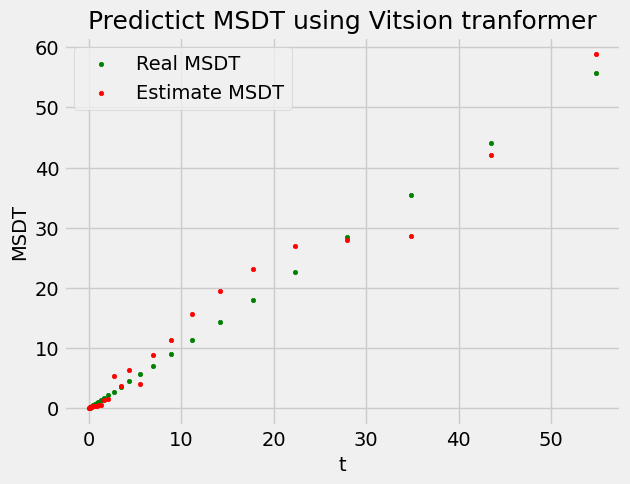

In [61]:
import matplotlib.pyplot as plt
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(list_t, lstMSDT,
            color = "green", s = 10, label = 'Real MSDT')
## plotting residual errors in test data
plt.scatter(list_t, lstpre_MSDT,
            color = "red", s = 10, label = 'Estimate MSDT')
## plotting line for zero residual error
#plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.xlim(-10, 10)
plt.ylim(-1, 1)
## plotting legend
plt.legend(loc = 'upper left')
## plot title
plt.title("Predictict MSDT using Vitsion tranformer", size=18)
plt.xlabel("t", size=14)
plt.ylabel("MSDT", size=14)
## method call for showing the plot
plt.show()

In [62]:
print(min(list_t))
print(max(list_t))

0.052498082
54.81658222


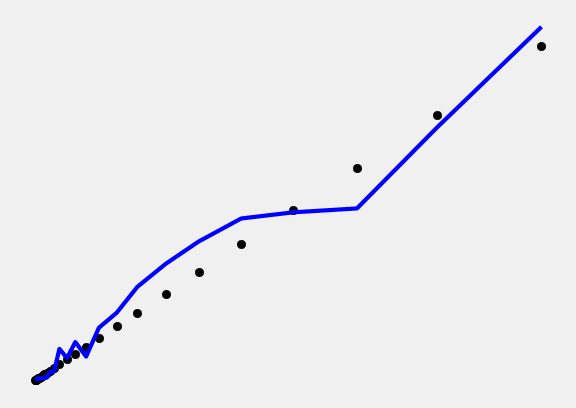

In [64]:
# Plot outputs
plt.scatter(list_t, lstMSDT, color="black")
plt.plot(list_t, lstpre_MSDT, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

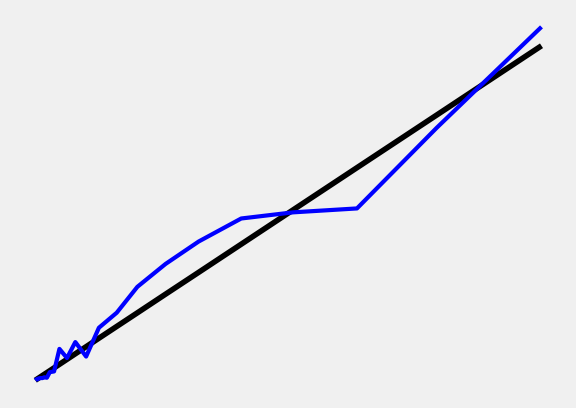

In [66]:
# Plot outputs
plt.plot(list_t, lstMSDT, color="black")
plt.plot(list_t, lstpre_MSDT, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

---------------------------------